**TASK 3**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv("Titanic.csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Missing values

print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Fill missing Values

df["Age"].fillna(df["Age"].median())
df["Embarked"].fillna(df["Embarked"].mode()[0])
if "Cabin" in df.columns:
    df = df.drop(columns=["Cabin"])
df = df.drop_duplicates()

In [8]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


**Histrogram (Age Distribution)**

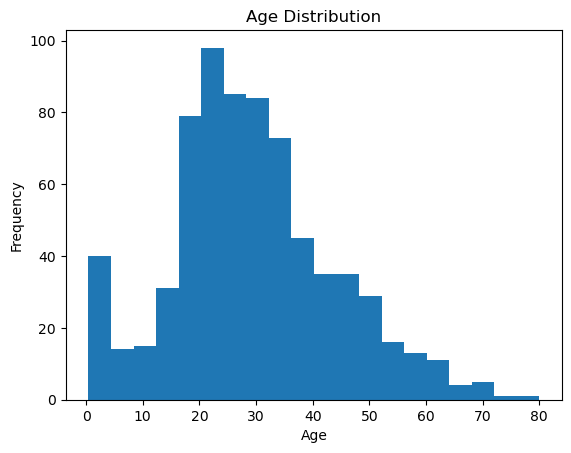

In [9]:
plt.figure()
plt.hist(df["Age"], bins = 20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

**Bar Chart(Gender Distribution)**

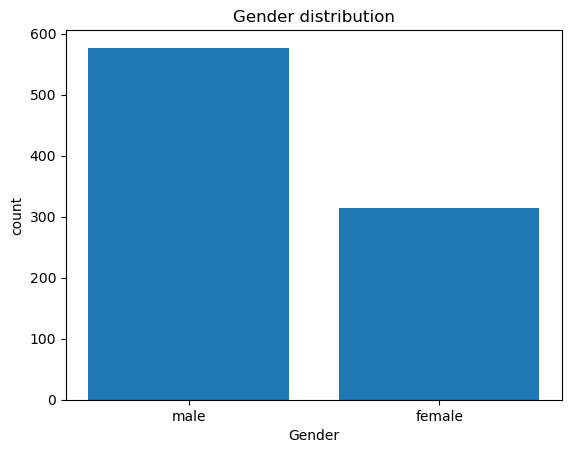

In [10]:
Gender_count = df["Sex"].value_counts()
plt.figure()
plt.bar(Gender_count.index, Gender_count.values)
plt.title("Gender distribution")
plt.xlabel("Gender")
plt.ylabel("count")
plt.show()

**Bar Chart(Survival Count)**

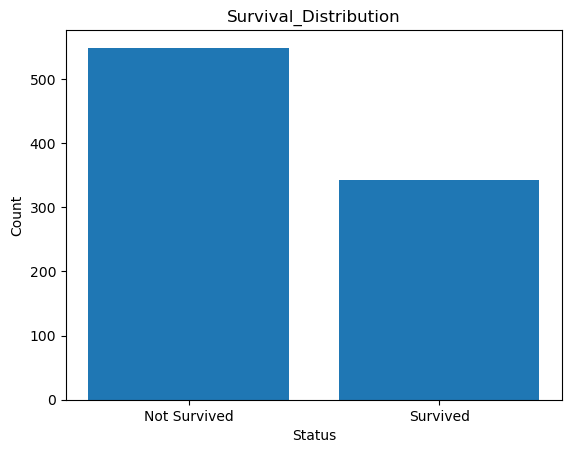

In [11]:
survival_count = df["Survived"].value_counts()
plt.bar(["Not Survived", "Survived"],survival_count.values)
plt.title("Survival_Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

**Age vs Survival(Relationship)**

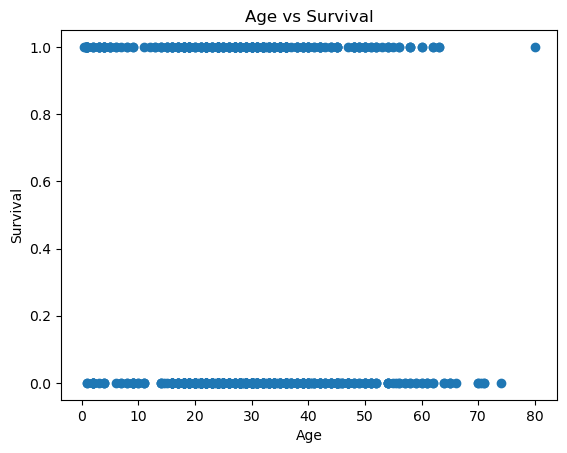

In [12]:
plt.figure()
plt.scatter(df["Age"], df["Survived"])
plt.title("Age vs Survival")
plt.xlabel("Age")
plt.ylabel("Survival")
plt.show()

**Class vs Survival(Pattern Analysis)**

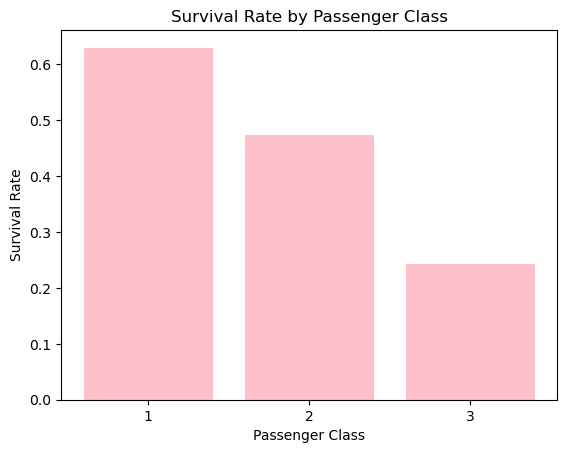

In [13]:
class_survival = df.groupby("Pclass")["Survived"].mean()

plt.figure()
plt.bar(class_survival.index.astype(str), class_survival.values, color = "pink")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()
